## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [2]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', recompile=False)

FileNotFoundError: File b'.//Tutorial_ch1-8_Onlap_relations/Tutorial_ch1-8_Onlap_relations_faults_relations.csv' does not exist

In [ ]:
geo_model.grid.resolution

In [ ]:
geo_model.faults.faults_relations_df =  pn.DataFrame(
    index=geo_model.series.df.index, columns=geo_model.series.df.index).notnull()

In [ ]:
geo_model.delete_series('basement')

In [ ]:
geo_model.map_series_to_surfaces({'left_series': 'basement'})

In [3]:
geo_model.surfaces

NameError: name 'geo_model' is not defined

In [7]:
geo_model.faults.faults_relations_df

,seafloor_series,left_series,onlap_series,right_series
seafloor_series,False,False,False,False
left_series,False,False,False,False
onlap_series,False,False,False,False
right_series,False,False,False,False


Displaying the input data:

In [8]:
geo_model.series.modify_order_series(4,1)

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Onlap
left_series,4,Erosion


In [9]:
geo_model.update_from_series()

In [10]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Onlap
left_series,4,Erosion


In [11]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,id
0,seafloor,seafloor_series,1,False,1
1,rock1,right_series,1,False,2
2,rock2,right_series,2,False,3
5,onlap_surface,onlap_series,1,False,4
3,rock3,left_series,1,False,5
4,basement,left_series,2,True,6


In [12]:
gp.activate_interactive_df(geo_model)

In [5]:
#geo_model.qi.get('orientations')

In [6]:
#geo_model.qi.get('surface_points')

In [13]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [14]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

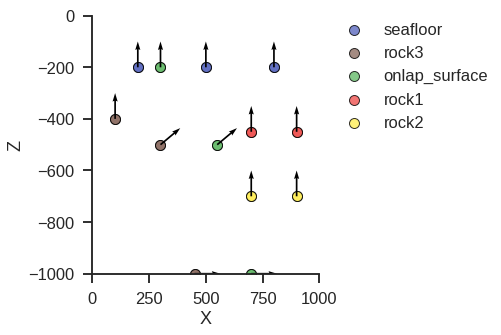

In [12]:
gp.plot.plot_data(geo_model, direction='y')

In [13]:
geo_model.update_from_surfaces()

In [14]:
geo_model.surface_points.df['surface']

0          seafloor
1          seafloor
2          seafloor
3          seafloor
4          seafloor
5          seafloor
7             rock1
6             rock1
8             rock1
9             rock1
13            rock2
12            rock2
11            rock2
10            rock2
14    onlap_surface
15    onlap_surface
16    onlap_surface
17    onlap_surface
18    onlap_surface
19    onlap_surface
20            rock3
21            rock3
22            rock3
23            rock3
24            rock3
25            rock3
Name: surface, dtype: category
Categories (6, object): [seafloor, rock1, rock2, onlap_surface, rock3, basement]

In [24]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,id
0,seafloor,seafloor_series,1,False,1
1,rock1,right_series,1,False,2
2,rock2,right_series,2,False,3
5,onlap_surface,onlap_series,1,False,4
3,rock3,left_series,1,False,5
4,basement,left_series,2,True,6


In [28]:
geo_model.additional_data

values
Structure isLith                                        True
          isFault                                      False
          number faults                                    0
          number surfaces                                  5
          number series                                    4
          number surfaces per series            [1, 2, 1, 1]
          len surfaces surface_points        [6, 4, 4, 6, 6]
          len series surface_points             [6, 8, 6, 6]
          len series orientations               [3, 4, 3, 3]
Options   dtype                                      float64
          output                                     geology
          theano_optimizer                      fast_compile
          device                                         cpu
          verbosity                                      [0]
Kringing  range                                      1417.74
          $C_o$                                      47857.1
          drift equations                       [3, 3, 3, 3]
          nugget grad                                   0.01
          nugget scalar                                1e-06
Rescaling rescaling factor                              1600
          centers                      [500.0, 50.0, -600.0]

In [16]:
value = geo_model.additional_data.kriging_data.df.loc['values', 'drift equations']

In [17]:
geo_model.additional_data.kriging_data.df.at['values', 'drift equations'] = np.array([3,3,3,3])

In [18]:
geo_model.additional_data.kriging_data.df.loc['values', 'drift equations']

array([3, 3, 3, 3])

In [27]:
geo_model.rescaling.rescale_data()

True

In [42]:
geo_model.additional_data.options.df.at['values', 'verbosity'] = []


In [103]:
import gempy.core.interpolator_pro as ip
import importlib
importlib.reload(ip)


<module 'gempy.core.interpolator_pro' from '../../gempy/core/interpolator_pro.py'>

In [104]:
im = ip.InterpolatorModel(geo_model.surface_points, geo_model.orientations,
                     geo_model.grid, geo_model.surfaces, geo_model.series,
                     geo_model.faults, geo_model.additional_data,
                     )

In [105]:
im.set_theano_shared_kriging()
im.set_theano_shared_structure_surfaces()
im.set_theano_shared_loop()
im.set_theano_shared_relations()
im.set_initial_results()

In [106]:
im.print_theano_shared()

[ 0  5 11 16 21]
[ 0  3  7 10 13]
[ 0 17 38 55 72]
[0 1 3 4 5]
[3 3 3 3]
[0 0 0 0]
[1 0 1 1]
[0 0 1 0]


In [107]:
th_f = im.compile_th_fn()

Compiling theano function...
Compilation Done!


In [108]:
im.theano_graph.number_of_points_per_surface_T.get_value()

array([5, 3, 3, 5, 5], dtype=int32)

In [109]:
im.theano_graph.fault_relation.get_value()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [110]:
i = im.get_python_input_block()


In [123]:
s = th_f(*i,
         np.array([1,1,1,1], dtype=bool),
         np.array([1,1,1,1], dtype=bool),
         np.array([1,1,1,1], dtype=bool))

In [112]:
s[1][1]

array([[4., 4., 4., ..., 2., 2., 2.]])

In [78]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion


In [118]:
geo_model.series.df.loc['left_series', 'BottomRelation'] = 'Onlap'
#geo_model2.series.df.loc['Fault_Series', 'BottomRelation'] = 'Onlap'

In [121]:
im.set_theano_shared_relations()
im.theano_graph.is_erosion.get_value()

array([1, 0, 1, 0])

In [122]:
im.theano_graph.is_onlap.get_value()

array([1, 0, 1, 0])

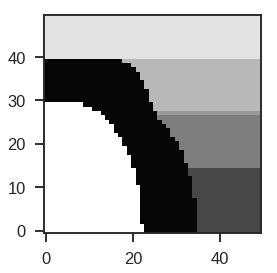

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(s[0][0, :12500].reshape(50,5,50)[:, 2, :].T, origin='bottom')
#plt.colorbar()

Update if any changes were made:

In [10]:
#geo_model.update_to_interpolator()
#gp.compute_model(geo_model, compute_mesh=False)

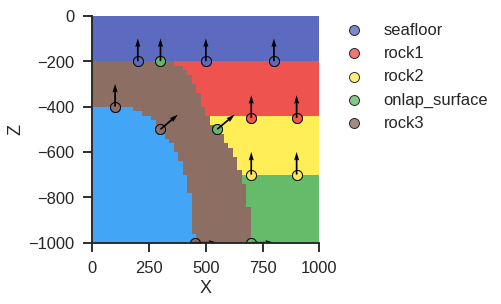

In [124]:
gp.plot.plot_section(geo_model, 2, block_type=s[0][0, :12500], plot_data=True)

Save model if any changes were made:

In [12]:
#geo_model.save_model('Tutorial_ch1-8_Onlap_relations')